In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import h5py
import numpy.ma as ma

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#Opening h5 data file, reading data into arrays, then closing file
file_name = '20120123.004_lp_5min-cal.h5'
hf = h5py.File(file_name, 'r')

altitude = np.array(hf['NeFromPower/Altitude'])
Ne_NoTr = np.array(hf['NeFromPower/Ne_NoTr'])
dtime = np.array(hf['Time/dtime'])

hf.close()

#Printing shape of arrays
print altitude.shape
print Ne_NoTr.shape
print dtime.shape

(4, 180)
(159, 4, 180)
(159, 2)


/usr/local/lib/python2.7/dist-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


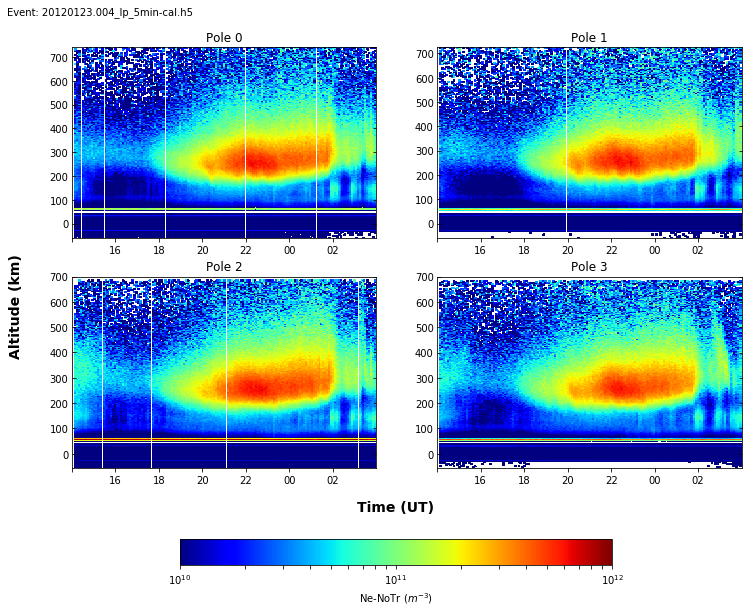

In [4]:
dtime_shift = np.copy(dtime)
dtime_shift[111,1] += 24
dtime_shift[112:,:]+= 24
xmin, xmax = dtime_shift[0,0], dtime_shift[-1,-1]
xpts = np.linspace(xmin,xmax,160)
d = {}
for i in range(4):
    d["Ne_NoTr_{}".format(i)] = np.array(Ne_NoTr[:,i,:])
    d["altitude_km_{}".format(i)] = (np.array(altitude[i,:]) / 1000)

n = 0; #plot index
major_ticks_x = np.arange(14,28,2)
major_ticks_y = np.arange(0,701,100)
lbs = ['','16','18','20','22','00','02']

fig_size = ['','']
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots(2,2)


for i in range(2):
    for j in range(2):
        ymin, ymax = d["altitude_km_{}".format(n)][0], d["altitude_km_{}".format(n)][-1]
        ypts = np.linspace(ymin,ymax,180)
        Y, X = np.meshgrid(ypts,xpts)
        Z = ma.masked_less_equal(d["Ne_NoTr_{}".format(n)],0)
        im = ax[i,j].pcolormesh(X,Y,Z,norm = colors.LogNorm(vmin = 10**10, vmax=10**12), cmap = plt.get_cmap('jet') )
        ax[i,j].set_xticks(major_ticks_x)
        ax[i,j].set_xticklabels(lbs)
        ax[i,j].set_yticks(major_ticks_y)
        ax[i,j].tick_params(axis = 'y',right=True, direction='in')
        ax[i,j].set_title("Pole {}".format(n))
        n += 1;      

fig.text(0.5, 0.19, 'Time (UT)', ha='center', va='center', fontsize = 14, fontweight = 'bold')
fig.text(0.06, 0.5, 'Altitude (km)', ha='center', va='center', rotation='vertical',fontsize = 14, fontweight = 'bold')
plt.subplots_adjust(bottom=0.25, top=0.9)
cax1 = fig.add_axes([.25,.1,.5,.04])
cbar = fig.colorbar(im, cax=cax1, orientation='horizontal')
cbar.set_label('Ne-NoTr ($m^{-3}$)' )
fig.text(.05, .95, 'Event: '+file_name )
plt.savefig('e_densities_2x2', dpi = 400)
